initial centroids are: [[1.84801320e+01 5.63436000e-01 1.13821000e+01 8.21040000e-02
  1.52444880e+01 3.71712000e-01 6.48000000e+00 5.34296400e+00
  4.26612842e+01]
 [2.64601890e+01 4.79520000e-03 3.44110000e-01 3.76310000e-01
  3.23556480e+00 8.51840000e-02 2.10600000e+01 2.78577000e-01
  4.58723132e+01]
 [1.94392218e+01 1.79820000e-03 2.83758400e-03 1.91576000e-02
  5.25117607e+00 6.89216000e-02 3.11058396e+01 7.70015400e-03
  4.45796912e+01]
 [2.58675181e+01 7.19280000e-02 3.94932400e+00 4.78940000e-02
  3.74112180e+00 2.32320000e-02 6.93000000e+00 1.21502430e+01
  4.47918532e+01]]
group result iteration 1 [226. 177. 435. 134.]
group result iteration 2 [194. 218. 435. 125.]
group result iteration 3 [155. 257. 435. 125.]
group result iteration 4 [139. 267. 441. 125.]
group result iteration 5 [130. 264. 453. 125.]
group result iteration 6 [127. 234. 486. 125.]
group result iteration 7 [117. 233. 497. 125.]
group result iteration 8 [109. 240. 498. 125.]
group result iteration 9 [102. 2

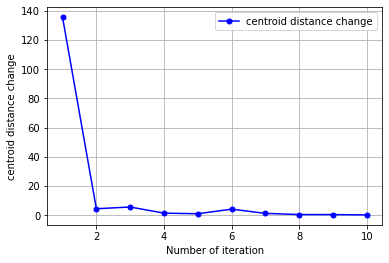

****************************** model performance ******************************
Homogeneity Score         (均一性):  0.7279176053762155
Completeness Score        (完整性):  0.7201963481323292
V-Measure Score           (V量):  0.7240363921126832
Adjusted Rand Score       (调整后兰德指数):  0.7173549829485324
Adjusted Mutual Info Score(调整后的共同信息):  0.7229358266335765
Calinski Harabasz Score:  (方差比指数)  827.966424309716
Silhouette Score          (轮廓分数):  0.6363246802914886
None


In [1]:
from kmeans_input_weight_class import *
import pandas as pd
import numpy as np

kmeans_input_weight=kmeans_input_weight()

orig_data = pd.read_excel('test4.xlsx')
orig_data.dropna(inplace=True)

x_orig_data = orig_data.drop('TRUE VALUE',axis=1)
y_label = orig_data['TRUE VALUE']

x_data=np.array(x_orig_data)

n_iters = 10
n_clusters = 4
centroids = kmeans_input_weight.plus_plus(x_data, n_clusters)  # centroilds initialization
dist = np.zeros((x_data.shape[0],n_clusters), dtype=float)

print("initial centroids are:",centroids)

w = pd.read_excel('weight.xlsx')  # input weight from weight.xlsx flie
w = np.array(w)
tol=1e-10
count=0
C = np.zeros(n_iters)
    
for i in range(n_iters):
    count+=1
    group= np.zeros(n_clusters)
    old_centroids=centroids.copy()
    for j in range(x_data.shape[0]):
        distance = np.power(x_data[j,:]-centroids, 2)  
        distance = np.sum(w*distance, axis=1)
        distance = np.sqrt(distance) 
        dist[j,:] = distance
    idx = np.argmin(dist, axis=1)   # predicted group index

    for k in range(n_clusters):
        d = x_data[idx==k, :]
        group[k]=d.shape[0]
        centroids[k,:] = np.mean(d, axis=0)
    print('group result iteration', count, group)   # group number after each iterration
    centroid_change=kmeans_input_weight.sqrsum(centroids - old_centroids)
    C[i]=centroid_change
    if centroid_change <= tol:
            break
print("Input_weight_Kmeans Finish!")

plt.plot(np.arange(n_iters)+1, C, color='blue', marker='o', markersize=5, label='centroid distance change')
plt.grid(True)
plt.xlabel("Number of iteration")
plt.ylabel("centroid distance change")
plt.legend(loc='best')
plt.show()

print(kmeans_input_weight.get_marks(x_data, y_label, idx))